# EXPLORATORY DATA ANALYSIS

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

### Displaying the dataset

In [3]:
df=pd.read_csv('eda_dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(10)

,VIN,brand,model,trim,manufacture_year,mileage,transmission,drive_type,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,state,MPG
0,W1KWF8DB9MR612417,Mercedes-Benz,C-Class,C 300 Sedan RWD,2021,13121,Automatic,RWD,Gas,Silver,Gray,0,3,Personaluse,41999,1,ID,29.0
1,1C4RJFJM9EC395245,Jeep,Grand Cherokee,Summit 4WD,2014,103404,Automatic,4WD,Diesel,Gray,Black,0,4,Personaluse,18299,8,NJ,20.5
2,JTEZU4BF5EK013919,Toyota,FJ Cruiser,RWD Automatic,2014,80830,Automatic,RWD,Gas,White,Black,0,1,Personaluse,32495,8,FL,18.0
3,1G1ZD5ST0LF122383,Chevrolet,Malibu,LT,2020,45480,Automatic,FWD,Gas,White,Black,0,1,Personaluse,19994,2,CA,32.5
4,1FTFW1E56JFB74611,Ford,F-150,Lariat SuperCrew 5.5' Box 4WD,2018,129900,Automatic,4WD,Gas,White,Gray,0,2,Personaluse,27831,4,ID,21.5
5,5YFEPRAE2LP096935,Toyota,Corolla,LE CVT,2020,21467,Automatic,FWD,Gas,White,Black,1,2,Personaluse,19300,2,ID,34.0
6,1FTEW1E55JKC28614,Ford,F-150,XL SuperCrew 5.5' Box 4WD,2018,120532,Automatic,4WD,Gas,White,Gray,0,1,Personaluse,21900,4,TX,20.5
7,1N4BL4BV1LC195664,Nissan,Altima,2.5 S FWD,2020,64425,Automatic,FWD,Gas,White,Black,0,1,Personaluse,21888,2,GA,33.5
8,1GNSCBKC4FR140888,Chevrolet,Tahoe,LT RWD,2015,80000,Automatic,RWD,Gas,Black,Brown,1,3,Personaluse,23310,7,TX,19.5
9,1FTFW1E47KKC32001,Ford,F-150,Lariat SuperCrew 5.5' Box 4WD,2019,139980,Automatic,4WD,Gas,Red,Black,0,1,Personaluse,27995,3,TX,21.5


### Checking the shape of the daatset

In [4]:
df.shape

(9845, 18)

In [5]:
df.columns

Index(['VIN', 'brand', 'model', 'trim', 'manufacture_year', 'mileage',
       'transmission', 'drive_type', 'fuel_type', 'exterior_color',
       'interior_color', 'accidents', 'owners', 'car_usage_type', 'price',
       'car_age', 'state', 'MPG'],
      dtype='object')

##### Extracted data consists of 9898 used car listings with 19 columns.

1. VIN : Vehicle Identification number which is unique    
2. brand: the company the car belongs to(automaker)
3. model: model of the vehicle
4. trim: more details of the vehicle model
5. manufacture_year : Year the vehicle was manufactured
6. mileage: mileage of the car
7. MPG: Avergae vehicle efficiency running in city and highway conditions, miles per gallon
8. transmission: automatic or manual transmission type
9. drive_type: drive type of the car
10. fuel_type: fuel type of the car, gasolin/diesel/hybrid/electric etc.
11. exterior_color: color of the car
12. interior_color: inside color of the car
13. accidents: contains data regarding accidents that happened to the car
14. owners: data about the number of previous owners
15. car_usage_type : contains details weather it was a personal vehicle or fleet vehicle used for rental purposes
16. Price : Price at which the car is being sold
17. car_age : Age of the car
18. state: current state where the car is located

### Checking if the dataset has any null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9845 entries, 0 to 9844
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VIN               9845 non-null   object 
 1   brand             9845 non-null   object 
 2   model             9845 non-null   object 
 3   trim              9845 non-null   object 
 4   manufacture_year  9845 non-null   int64  
 5   mileage           9845 non-null   int64  
 6   transmission      9845 non-null   object 
 7   drive_type        9845 non-null   object 
 8   fuel_type         9845 non-null   object 
 9   exterior_color    9845 non-null   object 
 10  interior_color    9845 non-null   object 
 11  accidents         9845 non-null   int64  
 12  owners            9845 non-null   int64  
 13  car_usage_type    9845 non-null   object 
 14  price             9845 non-null   int64  
 15  car_age           9845 non-null   int64  
 16  state             9845 non-null   object 


In [7]:
df.isna().sum()

VIN                 0
brand               0
model               0
trim                0
manufacture_year    0
mileage             0
transmission        0
drive_type          0
fuel_type           0
exterior_color      0
interior_color      0
accidents           0
owners              0
car_usage_type      0
price               0
car_age             0
state               0
MPG                 0
dtype: int64

##### We see there are no null values found in any of the columns

### More details about the dataset

#### Descriptive statistics for Numerical columns

In [8]:
df.describe()

,manufacture_year,mileage,accidents,owners,price,car_age,MPG
count,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000
mean,2017.692534,68342.198172,0.210868,1.593499,26370.233723,4.307466,25.054393
std,3.104150,44885.011690,0.493583,0.902904,13334.672877,3.104150,6.261837
min,1997.000000,5.000000,0.000000,0.000000,2000.000000,0.000000,12.000000
25%,2017.000000,35539.000000,0.000000,1.000000,18493.000000,2.000000,20.500000
50%,2019.000000,58317.000000,0.000000,1.000000,23995.000000,3.000000,23.500000
75%,2020.000000,92225.000000,0.000000,2.000000,32999.000000,5.000000,29.000000
max,2022.000000,341630.000000,5.000000,12.000000,257900.000000,25.000000,124.000000


##### We have vehicle models from 1997 - 2022, Mileage ranging from 5 miles to 266229 miles, Price between 2995 and 272990 dollars.


#### Descriptive statistics for Categorical columns

In [9]:
df.describe(exclude = np.number).T 

,count,unique,top,freq
VIN,9845,9845,W1KWF8DB9MR612417,1
brand,9845,45,Ford,2589
model,9845,334,F-150,1171
trim,9845,1440,XLT SuperCrew 5.5' Box 4WD,543
transmission,9845,2,Automatic,9731
drive_type,9845,4,FWD,4149
fuel_type,9845,5,Gas,9666
exterior_color,9845,15,White,3266
interior_color,9845,9,Black,6756
car_usage_type,9845,2,Personaluse,8139


### Looking at the coverage of data and the number of vehicles from each state

In [10]:
def perc_on_bar(plot, feature):
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 10)  
    plt.show()

In [11]:
df['state'].value_counts(sort=True)

 TX    2141
 FL    1526
 CA    1184
 NC     419
 GA     367
 VA     326
 NJ     277
 NY     271
 IL     250
 OH     236
 PA     236
 AZ     229
 TN     214
 IN     193
 WA     156
 MO     150
 CO     125
 MD     125
 MI     117
 AL     101
 NV      99
 SC      96
 KY      83
 OR      82
 MA      81
 ID      80
 OK      71
 AR      57
 WI      55
 LA      50
 CT      50
 NM      47
 MN      46
 IA      45
 KS      43
 UT      40
 NE      28
 NH      28
 ND      24
 HI      24
 MT      20
 MS      11
 WY       8
 AK       8
 WV       7
 DE       6
 RI       6
 SD       4
 ME       3
Name: state, dtype: int64

### Visualizing the number of car listings per state

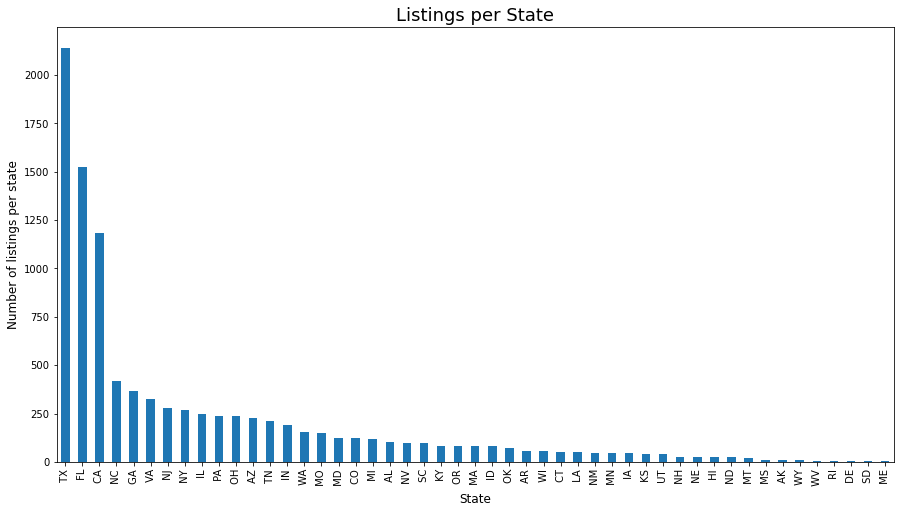

In [12]:
df.groupby(['state'])['manufacture_year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Listings per State', fontsize=18)
plt.show()

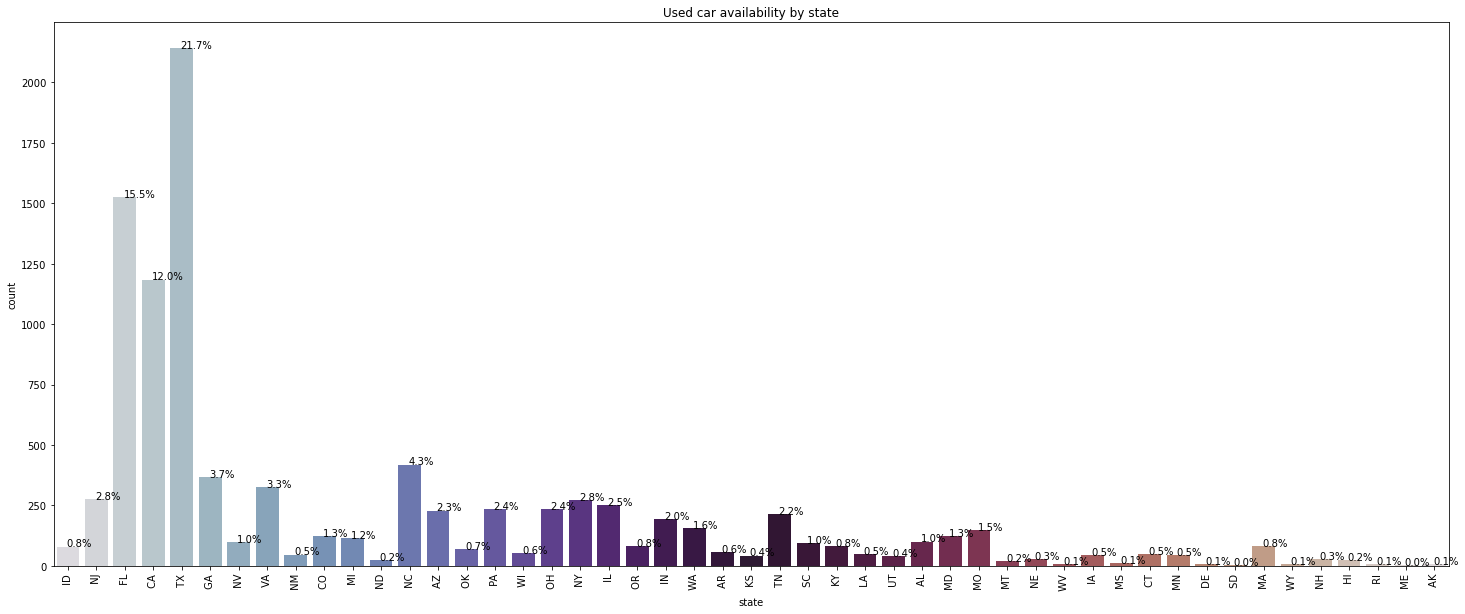

In [13]:
plt.figure(figsize=(25,10))
ax = sns.countplot(df['state'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Used car availability by state');
perc_on_bar(ax,df['state'])

#### Findings:
1. From this we can clearly see that texas stands in the first position in the number of listings with 2162 and next is florida with around 1532 car listings and california has 1187. The least number of cars being posted online from the state of Maine which is just 3.
2. We can clearly see that these three states have highest resale listings because we know that these states are highly populated when compared to other states. So it used cars have correlation with population.


### Vehicle listings per automaker

In [14]:
df['brand'].value_counts(sort=True)

Ford             2589
Chevrolet        1395
Nissan            844
Jeep              819
Toyota            819
Ram               461
Mercedes-Benz     374
Honda             346
Dodge             331
Hyundai           261
Kia               253
BMW               209
GMC               205
Lexus             166
Volkswagen        119
Chrysler          106
Cadillac           91
Buick              64
INFINITI           53
Lincoln            45
Audi               45
Mazda              38
Subaru             37
Volvo              32
Land Rover         30
Porsche            20
Acura              15
Jaguar             13
Scion              11
Mitsubishi         11
HUMMER              9
Maserati            8
Tesla               6
MINI                5
Mercury             5
Karma               1
FIAT                1
Isuzu               1
smart               1
Lamborghini         1
Ferrari             1
Alfa                1
Aston               1
Suzuki              1
Genesis             1
Name: bran

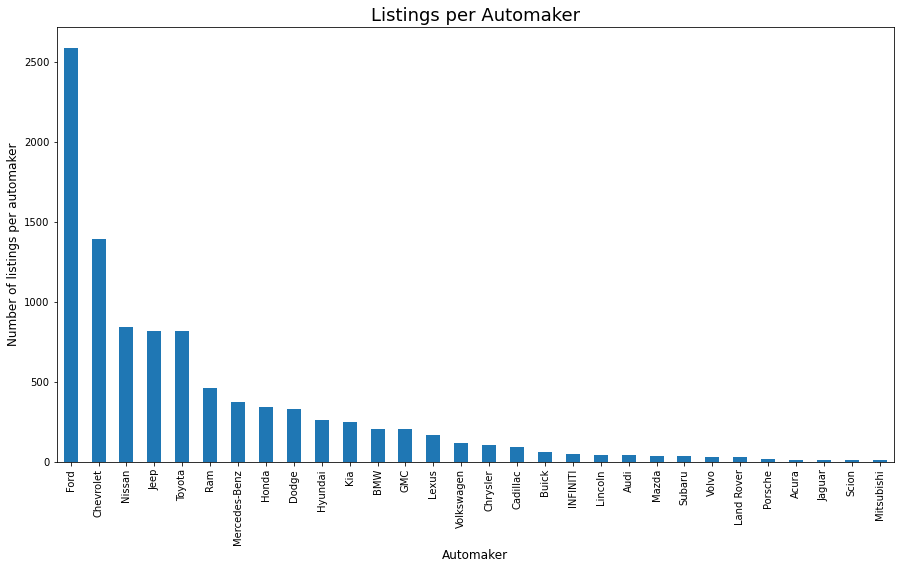

In [15]:
## Only listing the top 30 car makers for better visualization and aslo the rest does not have significant number of resale cars
df.groupby(['brand'])['manufacture_year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

In [16]:
len(df[(df.brand=='Ford') | (df.brand=='Chevrolet')|(df.brand=='Toyota')|(df.brand=='Jeep')|(df.brand=='Nissan')])/len(df)

0.6567800914169629

#### Findings:

Ford is the domimant brand on the used car market. And Chevrolet, Toyota, Jeep, Nissan are another top 4 makers. Totally they account for about 46% of the used car listings.

Ford and Chevrolet are two US brands that lots of consumers like to purchase (maybe because of US brand, brand loyalty, etc). Toyota and Nissan are two Japanese brands which represent for cost-benefit efficient cars and their used cars works very well after long-time use.

### Listing of cars by year and checking the distribution

In [17]:
df.manufacture_year.value_counts(sort=True)

2019    2884
2020    2181
2018    1365
2017     658
2016     523
2015     513
2021     431
2014     390
2013     285
2012     122
2011     102
2010      62
2008      59
2007      54
2022      39
2006      34
2009      34
2004      30
2005      21
2003      20
2002      14
2001       8
2000       7
1999       6
1998       2
1997       1
Name: manufacture_year, dtype: int64

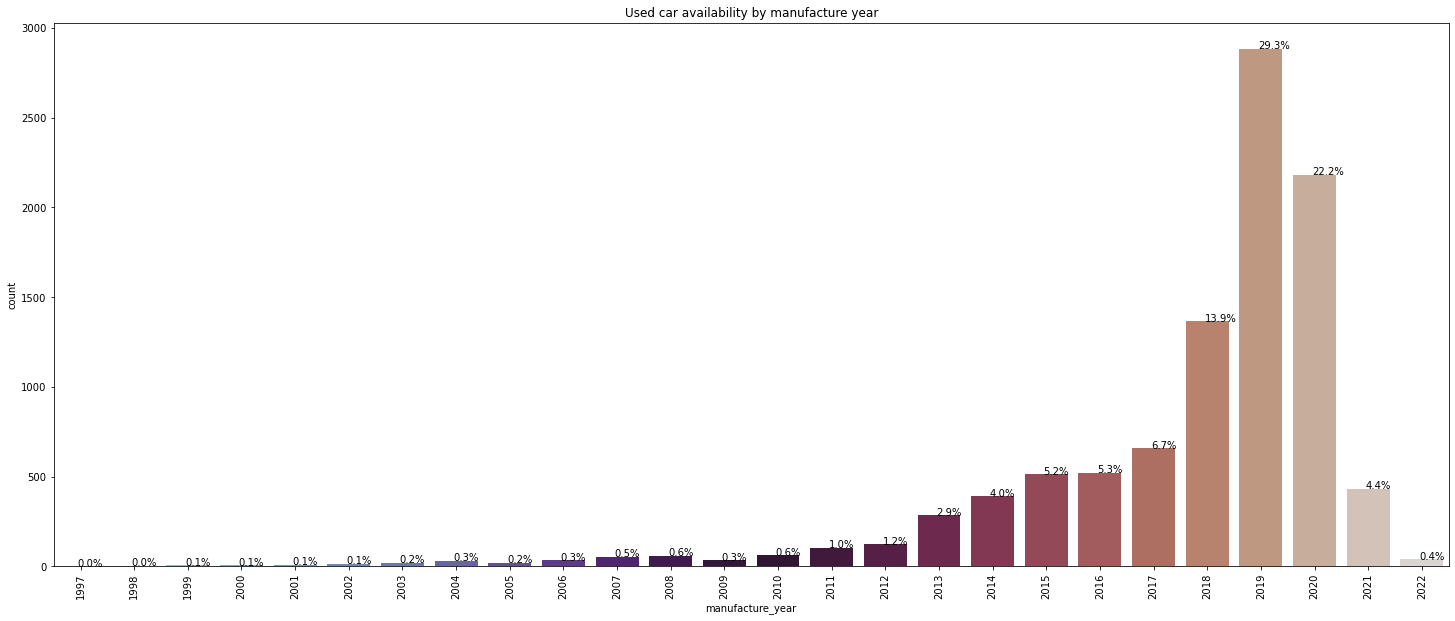

In [18]:
plt.figure(figsize=(25,10))
ax = sns.countplot(df['manufacture_year'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Used car availability by manufacture year');
perc_on_bar(ax,df['manufacture_year'])

##### Most of the cars posted are realatively new

### Checking if the cars sold on private website are mostly accidental?

In [19]:
df['accidents'].value_counts(sort=True)

0    8087
1    1493
2     220
3      38
4       6
5       1
Name: accidents, dtype: int64

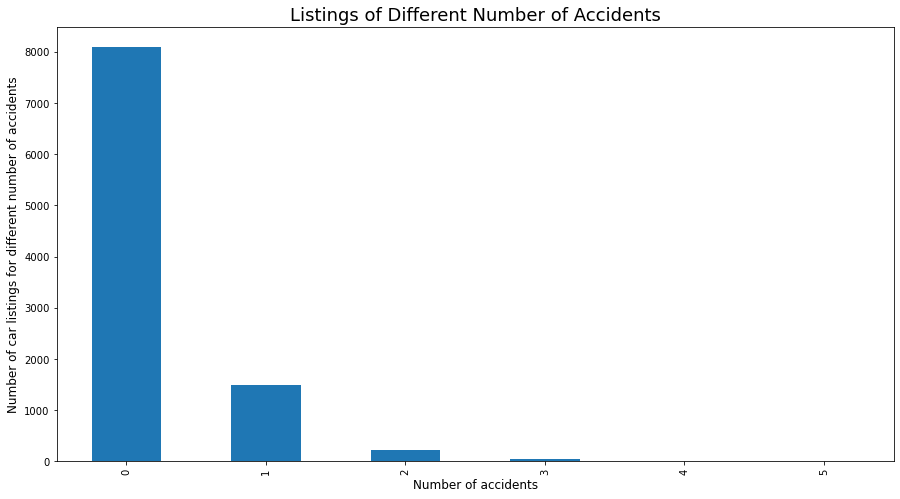

In [20]:
df.groupby(['accidents'])['manufacture_year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of car listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

##### Our hypothesis here is wrong that used car website publishes cars with accident history as most of the cars are with no accidents

### Used car availability by Fuel Type

In [21]:
df.fuel_type.value_counts(sort=True)

Gas         9666
Diesel       127
Hybrid        37
Electric      13
Hydrogen       2
Name: fuel_type, dtype: int64

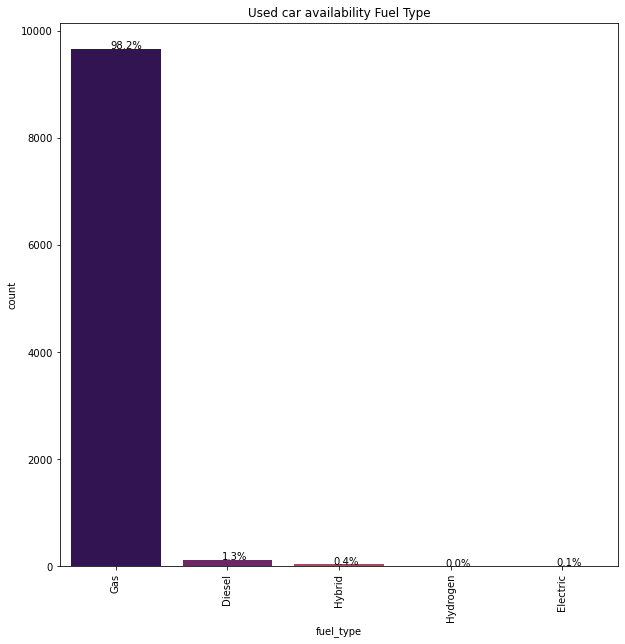

In [22]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df['fuel_type'],palette='inferno')
plt.xticks(rotation=90)
plt.title('Used car availability Fuel Type')
perc_on_bar(ax,df['fuel_type'])

##### Almost 96% of the car listings are with fuel type as Gas and only few cars are Hybrid, Diesel and Electri

### Used car availability by Transmission Type

In [23]:
df.transmission.value_counts(sort=True)

 Automatic    9731
 Manual        114
Name: transmission, dtype: int64

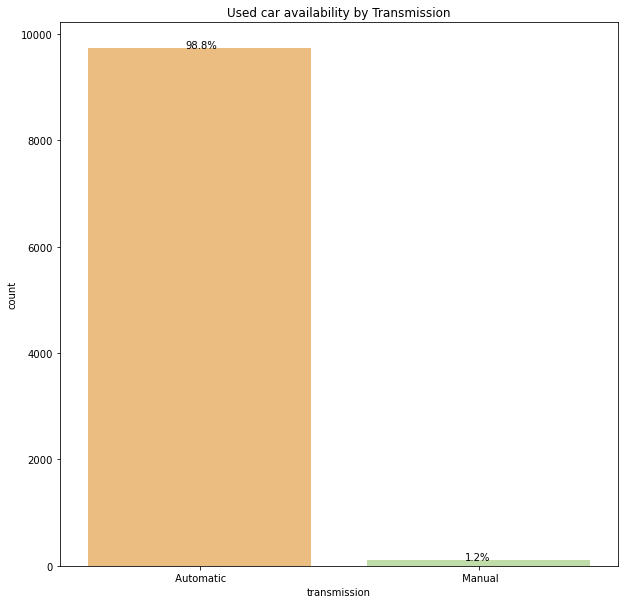

In [24]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df['transmission'],palette='Spectral')
plt.title('Used car availability by Transmission');
perc_on_bar(ax,df['transmission'])

##### Most of the cars have automatic transmission

### Checking for mean price of car based on various attributes available to us

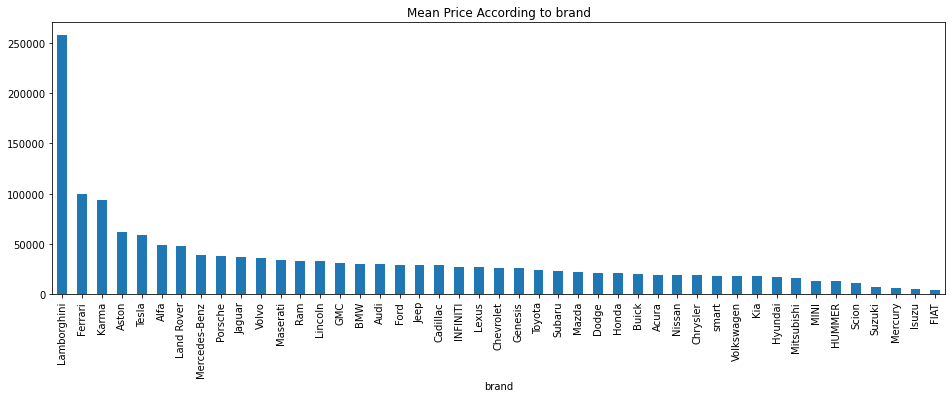

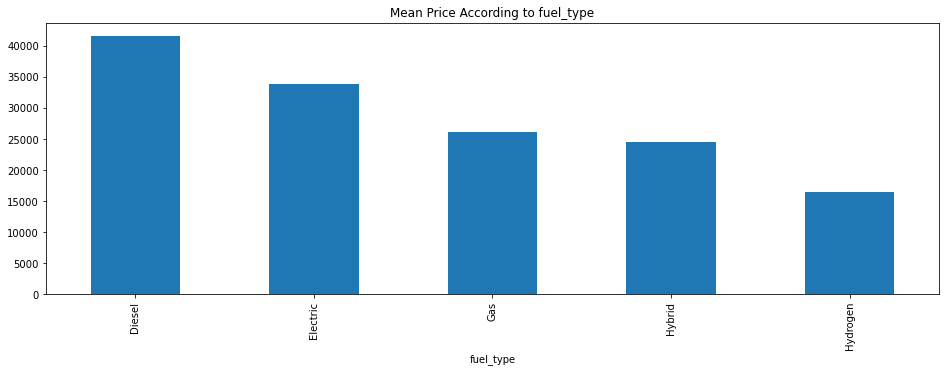

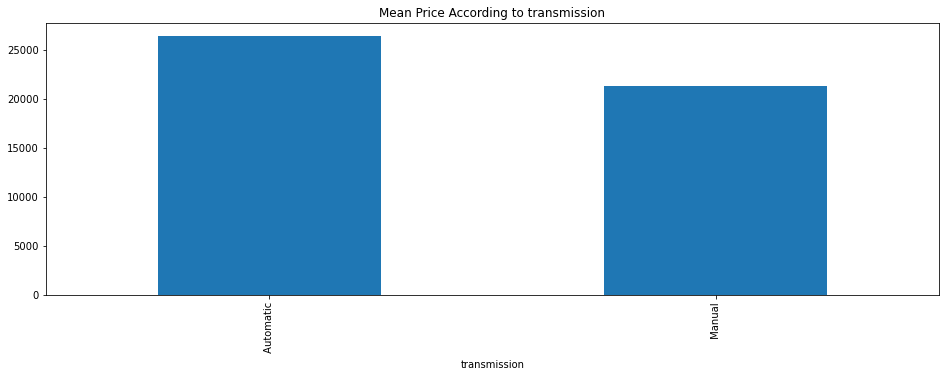

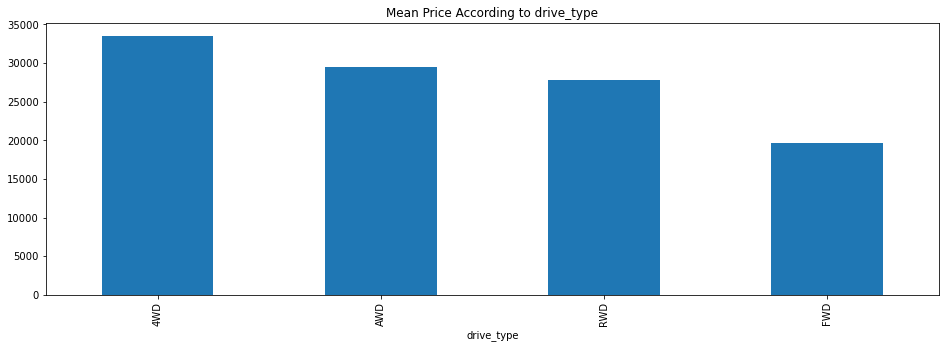

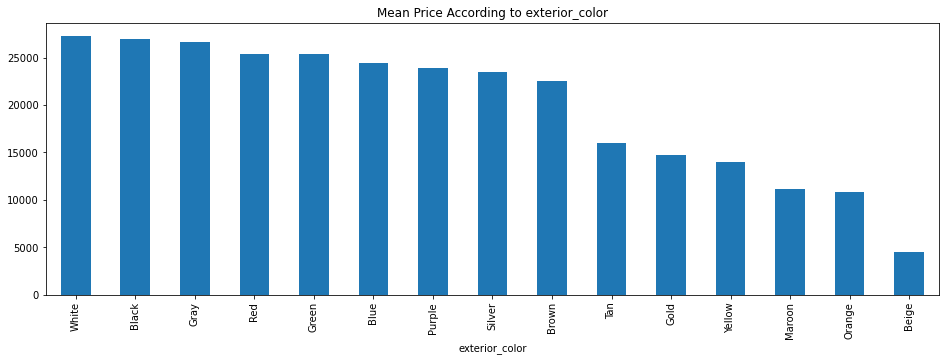

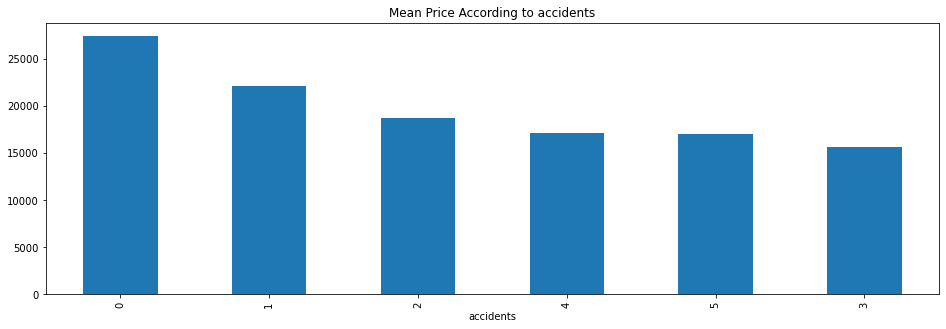

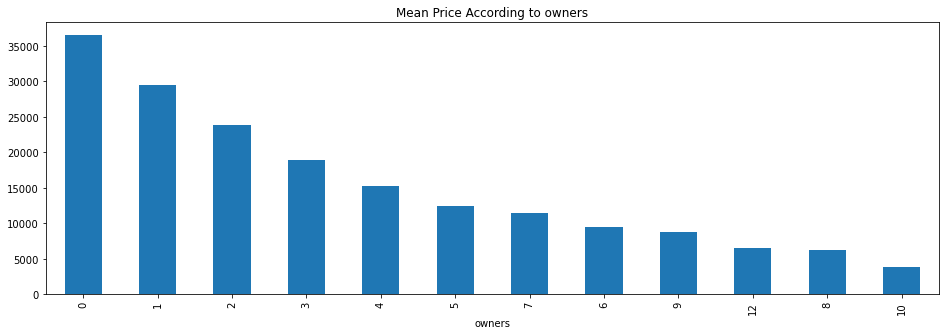

In [25]:
cols=["brand","fuel_type","transmission","drive_type","exterior_color", 'accidents',"owners"]
for i in cols:
    df.groupby(i)["price"].mean().sort_values(ascending=False).plot.bar(figsize=(16,5));
    plt.title("Mean Price According to " + str(i))
    plt.show();

### Checking for price distribution, since it is going to be our target variable

In [26]:
df['price'].describe()

count      9845.000000
mean      26370.233723
std       13334.672877
min        2000.000000
25%       18493.000000
50%       23995.000000
75%       32999.000000
max      257900.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Car Price Distribution Plot')

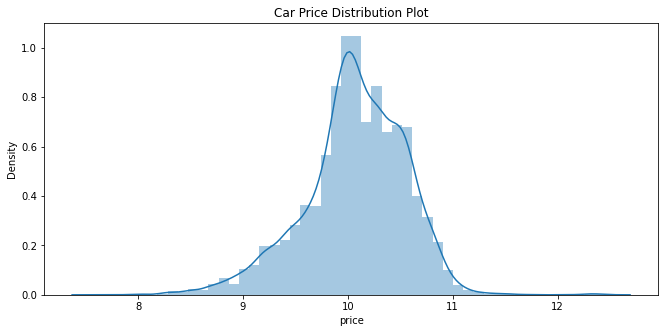

In [27]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(np.log1p(df['price']))
plt.title('Car Price Distribution Plot')

##### Looks right skewed. So we do normal distribution.

(array([   6.,   49.,  267.,  981., 3041., 3768., 1638.,   78.,    7.,
          10.]),
 array([ 7.60140233,  8.08729521,  8.57318808,  9.05908096,  9.54497383,
        10.0308667 , 10.51675958, 11.00265245, 11.48854532, 11.9744382 ,
        12.46033107]),
 <BarContainer object of 10 artists>)

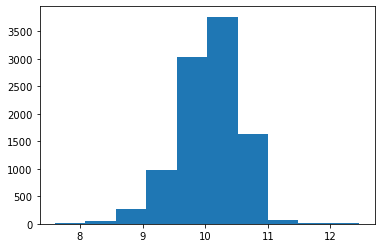

In [28]:
plt.hist(np.log1p(df["price"]))

### Finding the corerelation among the columns

In [29]:
df.corr()

,manufacture_year,mileage,accidents,owners,price,car_age,MPG
manufacture_year,1.000000,-0.622046,-0.150286,-0.540606,0.478893,-1.000000,0.136561
mileage,-0.622046,1.000000,0.159007,0.382259,-0.508903,0.622046,-0.099466
accidents,-0.150286,0.159007,1.000000,0.166375,-0.174177,0.150286,0.027546
owners,-0.540606,0.382259,0.166375,1.000000,-0.323683,0.540606,-0.021899
price,0.478893,-0.508903,-0.174177,-0.323683,1.000000,-0.478893,-0.313640
car_age,-1.000000,0.622046,0.150286,0.540606,-0.478893,1.000000,-0.136561
MPG,0.136561,-0.099466,0.027546,-0.021899,-0.313640,-0.136561,1.000000


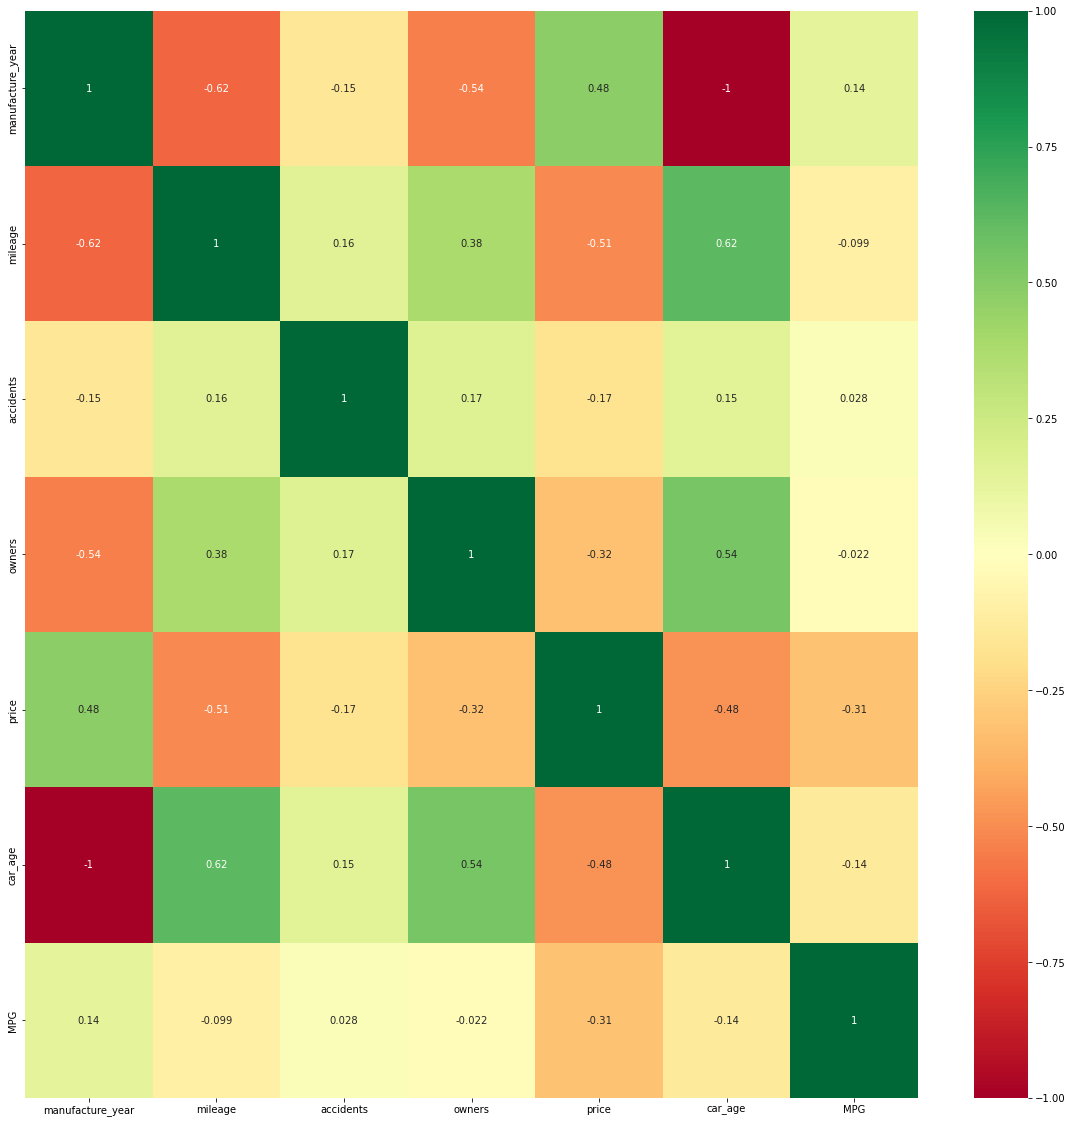

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Checking the linearity among the columns

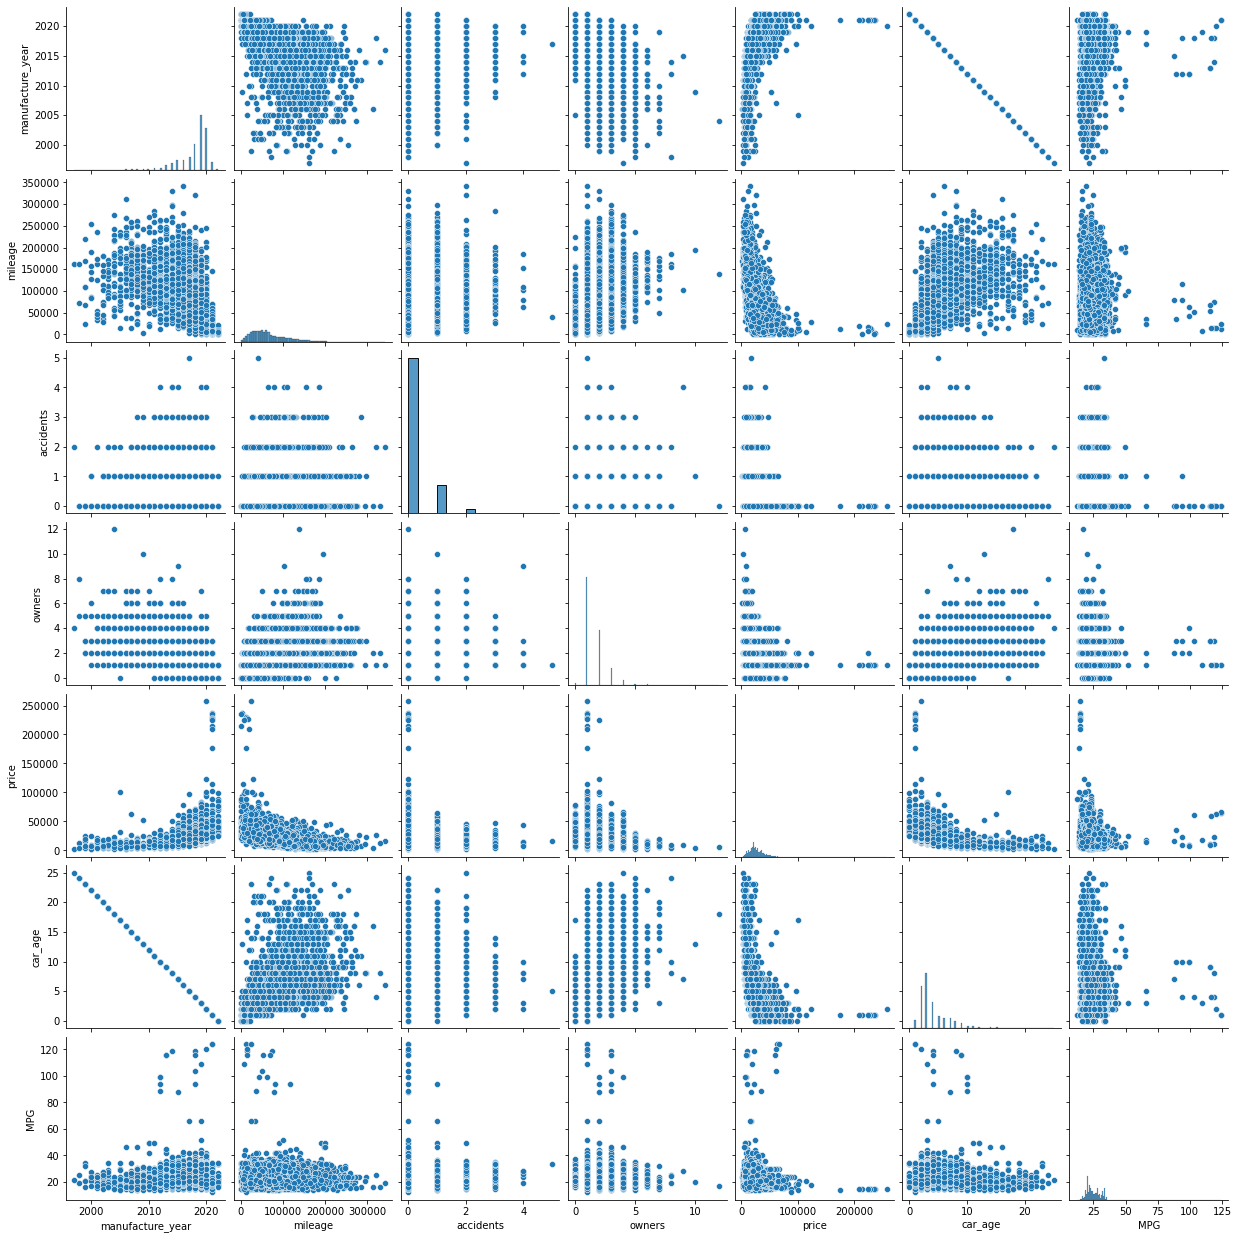

In [31]:
sns.pairplot(df)

#### We see the linearity only between car_age and manufacture year, and also between MPG_city and MPG_highway